# TODO:
- I guess give up on OPR for time being?
    - switch to direct MAT reading with layer and layerData functions
        - verify vs. OPR echograms
    - schedule time with John to review the python code and see what changed in OPR

In [1]:
from project_classes import *
from functions import *
from iceflow_library import *

In [2]:
zoom = True
seg_length = 100
season = "2018_Antarctica_DC8" # a layerData season
season = "2016_Antarctica_DC8" # a season with both layer and layerData
# season = "2014_Antarctica_DC8" # a layerData season
flight = "20181030_01"  # the flight date and frame number
flight = "20181103_01"
# flight = "20181112_02"  # the problem flight
flight = "20161024_05"
# flight = '20141026_06'
file_name = "layer_export_" + flight + ".pickle"
testing = False

### read in the layers from the layer files and save them to a pickle file

In [3]:
# if the file at filename exists, read in the layers from the pickle file
# otherwise, read in the layers from the layer files and save them to a pickle file
# if not os.path.isfile(file_name):  # if the file does not exist
#     print(f"File {file_name} does not exist. Making it...")
#     # mat_pickler_layerData(season, flight, testing_mode=testing, layer=True)  # make it
#     mat_pickler_layerData(season, flight, testing_mode=testing, layer=False)  # make it
# mat_pickler_layerData(season, flight, testing_mode=testing)  # make it
mat_pickler_layer(season, flight, testing_mode=testing)  # make it
layers = read_layers(file_name)  # read in the layers from the pickle file

Reading data files...
--------------------
layer_attributes_file: layer_20161024_05.mat
DATA MAT FILE KEYS:
header, version, globals, elev, file_type, file_version, gps_time, id, lat, lon, param, quality, twtt, type
LAYER ATTRIBUTES MAT FILE KEYS:
header, version, globals, file_type, file_version, lyr_age, lyr_age_source, lyr_desc, lyr_group_name, lyr_id, lyr_name, lyr_order, param
--------------------

debug:
data_mat type: <class 'dict'>
data_mat[0] keys:
header, version, globals, elev, file_type, file_version, gps_time, id, lat, lon, param, quality, twtt, typetwtt: [[5.54517000e-05 5.54517000e-05 5.54517000e-05 ... 5.83841740e-05
  5.83865502e-05 5.83890996e-05]
 [           nan            nan            nan ... 6.36720058e-05
  6.36575653e-05 6.36488182e-05]
 [           nan            nan            nan ...            nan
             nan            nan]]
twtt[0]: [5.54517000e-05 5.54517000e-05 5.54517000e-05 ... 5.83841740e-05
 5.83865502e-05 5.83890996e-05]
twtt[0][0]: 5.54517e-

### read in the iceflow data from the iceflow data files and save them to a pickle file

In [4]:
try:
    iceflow_data = iceflow_data_file_loader()
    print("The iceflow data pickle file was found and loaded.")
except FileNotFoundError:
    print("The iceflow data pickle file was not found. Creating a new one...")
    filename = iceflow_saver()
    iceflow_data = iceflow_loader(filename)
    print("The iceflow data pickle file was successfully created.")
    
x = iceflow_data[0]
y = iceflow_data[1]
velocity_x = iceflow_data[2]
velocity_y = iceflow_data[3]
latitude = iceflow_data[4]
longitude = iceflow_data[5]

The iceflow data pickle file was found and loaded.


# next step: continue working through crossover.py to rebuild the code

In [5]:
intersection_points, intersection_indices, segment_ends = cross_point(layers[0], seg_length, quiet=True)
# find the crossover points
print(f"len(intersection_indices): {len(intersection_indices)}")
print(f"len(intersection_points): {len(intersection_points)}")

Finding crossover point...
--------------------
Checking for intersections...
Number of intersections: 10
Index 0: 
indices: 	[27259, 110002]
lat-lon: 	(-81.11805741453195, -29.734744400231527)
segment ends: 	[[(-81.11816244525122, -29.73509516444382), (-81.11804305866158, -29.73469645687178)], [(-81.11805932746817, -29.734692394860527), (-81.11802820171967, -29.735538584123283)]]
lat-lon by layer: 	(-81.11816244525122, -29.73509516444382)
Index 1: 
indices: 	[33472, 108322]
lat-lon: 	(-81.16770118306837, -28.305846101207493)
segment ends: 	[[(-81.16768709742837, -28.30579867911967), (-81.16780642066725, -28.306200404359963)], [(-81.16772410189748, -28.305143441473003), (-81.16769619365431, -28.305999069770742)]]
lat-lon by layer: 	(-81.16768709742837, -28.30579867911967)
Index 2: 
indices: 	[43768, 105222]
lat-lon: 	(-81.23888292313913, -25.623627757303908)
segment ends: 	[[(-81.23895935598836, -25.623889163118154), (-81.23884022806007, -25.623481737078055)], [(-81.2388842805298, -25.

In [6]:
""" Current Project 30Jan24 """
# TODO: deconstruct the nested lists and make them make more sense

print(f"intersection_indices: {intersection_indices}")
print(f"intersection_points: {intersection_points}")

intersection_indices: [[27259, 110002], [33472, 108322], [43768, 105222], [54074, 103777], [58012, 64382], [59793, 81395], [60851, 82569], [66559, 101434], [78721, 99407], [91029, 94355]]
intersection_points: [[-81.11816244525122, -29.73509516444382], [-81.16768709742837, -28.30579867911967], [-81.23895935598836, -25.623889163118154], [-81.25529478543223, -24.353037639856126], [-81.54211694082927, -23.254932137952057], [-81.53829900294835, -21.64525117572498], [-81.66313025161077, -21.46914621408348], [-81.27279325012884, -22.284694479304264], [-81.23341834846097, -20.55596548970905], [-80.93188421539811, -16.63378474506194]]


In [16]:
def plot_layers_at_cross(layers, intersection_indices, intersection_points, zoom=False, refractive_index=1.77,
                         cross_index=0):
    """
    :param layers: a list of Layer objects
    :param intersection_indices: a list of indices in the lat-lon arrays where the flight path
    crosses over itself
    :param intersection_points: a list of lat-lon points where the flight path crosses over itself
    :return: nothing (plots the layers and the map)
    """
    plt.figure(figsize=(24, 12), layout='constrained')
    print("Plotting layers and map...")
    print("--------------------")
    print("Adjusting for surface twtt...")
    for layer in layers:
        corrected_layer = layer.twtt - layers[0].twtt
        layer.twtt_corrected = corrected_layer

    # ax2 will be the layer plot
    plt.subplot(1, 2, 1)

    # plot the layer depths vs index for 500 points before and after the first
    # crossover point for each layer.
    # also plot the layer depths vs index for 500 points before and after the
    # second crossover point for each layer.
    offset = 500
    # plot the corrected twtt for each layer
    plt.plot(
        layers[0].twtt_corrected[intersection_indices[0][0] - offset:intersection_indices[cross_index][0] + offset],
        label=layers[0].layer_name)
    plt.plot(
        layers[1].twtt_corrected[intersection_indices[0][0] - offset:intersection_indices[cross_index][0] + offset],
        label=layers[1].layer_name + ' segment 1')
    plt.plot(
        layers[1].twtt_corrected[intersection_indices[0][1] - offset:intersection_indices[cross_index][1] + offset],
        label=layers[1].layer_name + ' segment 2')

    # plot uncorrected twtt for each layer
    # plt.plot(layers[0].twtt[intersection_indices[0][0] - offset:intersection_indices[0][0] + offset],
    #             label=layers[0].layer_name)
    # plt.plot(layers[1].twtt[intersection_indices[0][0] - offset:intersection_indices[0][0] + offset],
    #             label=layers[1].layer_name + ' segment 1')
    # plt.plot(layers[1].twtt[intersection_indices[0][1] - offset:intersection_indices[0][1] + offset],
    # label=layers[1].layer_name + ' segment 2')

    # invert the y-axis because the twtt increases with depth
    plt.gca().invert_yaxis()
    # plot the crossover point on the plot
    plt.scatter(offset, twtt_at_point(layers[1], layers[0],
                                      intersection_indices, quiet=True)[0][0], color='red',
                label='X Point 1')
    plt.scatter(offset, twtt_at_point(layers[1], layers[0],
                                      intersection_indices, quiet=True)[0][1], color='green',
                label='X Point 2')
    # plot a line at the crossover point
    plt.axvline(x=offset, color='black', label='X Point', linestyle='--', linewidth=0.3)

    # set the y axis to be in nanoseconds instead of seconds
    plt.ylabel("Adjusted Two Way Travel Time (ns)")
    plt.xlabel("Index")

    # force the y values to be displayed in 1e-6 ticks (microseconds) instead of 1e-5 ticks (tens of microseconds)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0), useMathText=True)

    def s_to_ms(x, pos):
        """
        :param x: the x value
        :param pos: the position
        :return: the x value in milliseconds
        """
        return '%1.1f' % (x * 1e6)

    # set the y axis to be in microseconds instead of seconds
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(s_to_ms))

    # make the right side y axis show the depth in meters by converting the twtt to depth using the refractive index
    min_y, max_y = plt.ylim()
    n = refractive_index
    c = 299792458  # m/s
    v = c / n
    # depth = twtt * v / 2
    scale_factor = v / 2
    print(f"scale factor: {scale_factor}")
    plt.twinx()
    plt.ylim(min_y * scale_factor, max_y * scale_factor)
    plt.ylabel("Depth (m)")

    # make the top of the x axis be the distance in meters by converting the lat-lon to distance using the haversine formula
    min_x, max_x = plt.xlim()
    scale_factor = latlon_dist((layers[0].lat[0], layers[0].lon[0]), (layers[0].lat[1], layers[0].lon[1]))
    print(f"scale factor: {scale_factor}")
    plt.twiny()
    plt.xlim(min_x * scale_factor, max_x * scale_factor)
    plt.xlabel("Distance (m)")

    plt.title("Adjusted Two Way Travel Time vs Index")
    plt.legend(["legend"], fontsize='smaller', loc='upper right', bbox_to_anchor=(1.1, 1.1))

    """
    plot the map
    """
    plt.subplot(1, 2, 2)

    # TODO: add an offset to the zoom settings so that the crossover point is in the center of the zoomed in map

    # # this code sets up a polar stereographic map of antarctica with the South Pole in the center
    zoom_out_to_continent = not zoom
    if zoom_out_to_continent:
        llcrnrx = -400000
        llcrnry = -400000
        urcrnrx = 250000
        urcrnry = 250000
    else:
        llcrnrx = -100000
        llcrnry = -100000
        urcrnrx = 100000
        urcrnry = 100000
    lat_0 = intersection_points[cross_index][0]
    lon_0 = intersection_points[cross_index][1]
    m = Basemap(projection='ortho', lat_0=lat_0, lon_0=lon_0, llcrnrx=llcrnrx,
                llcrnry=llcrnry, urcrnrx=urcrnrx, urcrnry=urcrnry, resolution='c')

    m.drawcoastlines()
    m.fillcontinents(color='grey', lake_color='aqua')
    m.drawparallels(np.arange(-80., 81., 20.))
    m.drawmeridians(np.arange(-180., 181., 20.))
    m.drawmapboundary(fill_color='aqua')

    # plot the flight path
    m.plot(layers[0].lon, layers[0].lat, latlon=True, color='lightgreen', linewidth=1)
    # plot the section of the flight path in the plot above
    m.plot(layers[0].lon[intersection_indices[0][0] - offset:intersection_indices[0][0] + offset],
           layers[0].lat[intersection_indices[0][0] - offset:intersection_indices[0][0] + offset], latlon=True,
           color='red', linewidth=1) 
    m.plot(layers[0].lon[intersection_indices[0][1] - offset:intersection_indices[0][1] + offset],
           layers[0].lat[intersection_indices[0][1] - offset:intersection_indices[0][1] + offset], latlon=True,
           color='green', linewidth=1)
    # plot labels for the flight paths at their start points
    plt.text(
        m(layers[0].lon[intersection_indices[0][0] - offset], layers[0].lat[intersection_indices[0][0] - offset])[
            0],
        m(layers[0].lon[intersection_indices[0][0] - offset], layers[0].lat[intersection_indices[0][0] - offset])[
            1], '\nsegment 1', fontsize='smaller', fontweight='bold', ha='right', va='top', color='red')
    plt.text(
        m(layers[0].lon[intersection_indices[0][1] - offset], layers[0].lat[intersection_indices[0][1] - offset])[
            0],
        m(layers[0].lon[intersection_indices[0][1] - offset], layers[0].lat[intersection_indices[0][1] - offset])[
            1], '\nsegment 2', fontsize='smaller', fontweight='bold', ha='left', va='top', color='green')
    # plot the South Pole
    # m.scatter(0, -90, latlon=True, color='black', linewidth=1, label='South Pole')
    # plot the crossover points
    for point in intersection_points:
        m.scatter(point[1], point[0], latlon=True, color='darkred', linewidth=1, label='Crossover Point')
        plt.text(m(point[1], point[0])[0], m(point[1], point[0])[1] - 10000, 'Crossover Point\n\n',
                 fontsize='smaller', fontweight='bold', ha='center', va='top', color='darkred')

    # m.scatter(intersection_points[cross_index][1], intersection_points[cross_index][0], latlon=True, color='darkred',
    #           linewidth=1, label='Crossover Point')
    # plt.text(m(intersection_points[cross_index][1], intersection_points[cross_index][0])[0],
    #          m(intersection_points[cross_index][1], intersection_points[cross_index][0])[1] - 10000,
    #          'Crossover Point\n\n',
    #          fontsize='smaller', fontweight='bold', ha='center', va='top', color='darkred')

    # plot the crossover line

    x, y = m(0, -90)
    # plt.text(x, y, '\nSouth Pole', fontsize='smaller', fontweight='bold', ha='center', va='top', color='black')
    plt.title("Lat-Lon Map")
    # set tight layout
    # plt.tight_layout()

    # save the plot
    plt.savefig("layer_plot.png", dpi=250)

    plt.show()

    print("plotted map")
    print("--------------------\n")


Plotting layers and map...
--------------------
Adjusting for surface twtt...
scale factor: 84687135.0282486
scale factor: 14.936579591230279


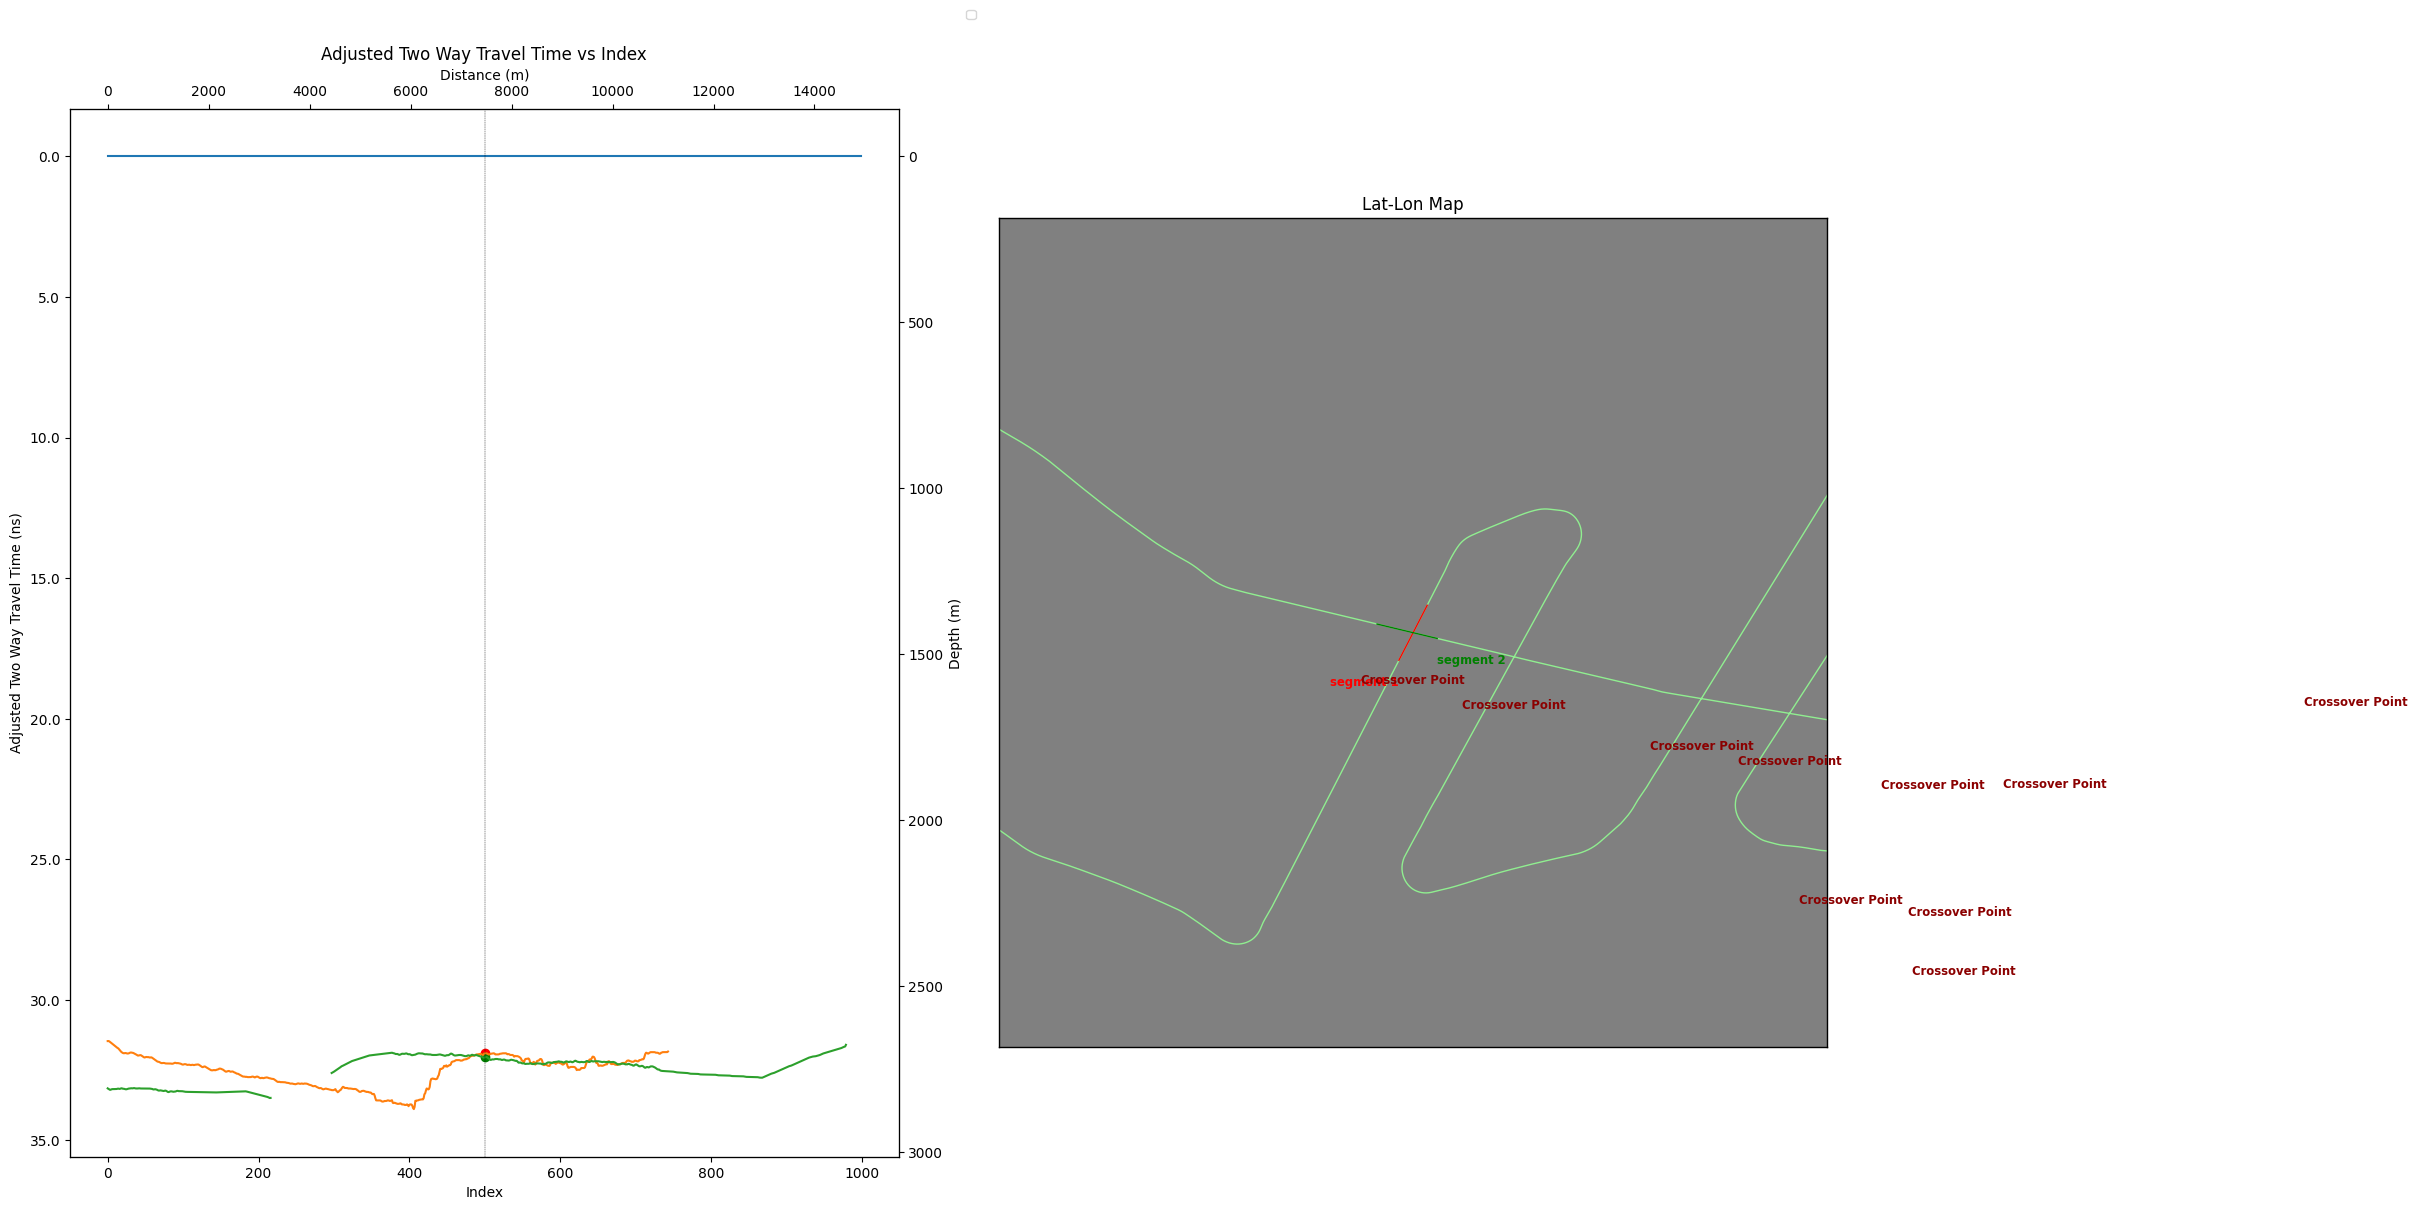

plotted map
--------------------


In [7]:
# plot_layers_at_cross(layers, intersection_indices_base, intersection_points_base,cross_index=3, zoom=zoom)

plot_layers_at_cross(layers, intersection_indices, intersection_points, cross_index=0, zoom=zoom)

In [18]:
# def nearest_flow_to_latlon(lat, lon, iceflow_data):
#     """
#     :param lat: the latitude of the point
#     :param lon: the longitude of the point
#     :param iceflow_data: the iceflow data
#     :return: the nearest iceflow data to the lat-lon point
#     """
#     # find the nearest x and y values in the iceflow data
#     x, y = latlon_to_xy(lat, lon)
#     x, y = find_nearest_unmasked_x_and_y(x, y, iceflow_data, max_radius=1000)
#     flow = flow_at_x_y(x, y, iceflow_data)
#     return flow

nearest_flow_to_latlon(intersection_points[0][0], intersection_points[0][1], iceflow_data)

(-4.562623, 5.5894647)

In [8]:
# calculate the twtt at the crossover point on both segments
twtt = twtt_at_point(layers[1], layers[0], intersection_indices, quiet=True)
print(f"twtt: {twtt}")


twtt: [[3.189429995299016e-05, 3.204561655810654e-05], [3.45252e-05, 3.4615102766759925e-05], [nan, nan], [3.3373799999999995e-05, 3.2849779514319274e-05], [1.8413960828014443e-05, 1.857512450601765e-05], [3.3324268156376655e-06, 3.200836695807508e-06], [1.0508794373187518e-05, 5.4386216869077805e-06], [3.7474799999999996e-05, nan], [3.241379866212265e-05, 3.2358803905191436e-05], [3.331579781304637e-05, 3.488323693027917e-05]]


In [9]:
delta_twtt = twtt[0][1] - twtt[0][0]
print(f"delta_twtt: {delta_twtt}")

# find the angle and magnitude of the velocity at the crossover point
flow = nearest_flow_to_latlon(intersection_points[0][0], intersection_points[0][1], iceflow_data)
print(f"flow: {flow}")
angle = math.degrees(math.atan2(flow[1], flow[0]))
print(f"angle: {angle}")
magnitude = math.sqrt(flow[0] ** 2 + flow[1] ** 2)
print(f"magnitude: {magnitude}")

# find the heading of the first segment
heading_1 = find_heading(layers[0], intersection_indices[0][0])
print(f"heading_1: {heading_1}")

# find the heading of the second segment
heading_2 = find_heading(layers[0], intersection_indices[0][1])
print(f"heading_2: {heading_2}")

delta_twtt: 1.5131660511637695e-07
flow: (-4.562623, 5.5894647)
angle: 129.22441134903784
magnitude: 7.21523693957814
heading_1: 27.296731944188767
heading_2: -76.49805266184431


In [10]:
# repeat the above for every crossover point
twtt = twtt_at_point(layers[1], layers[0], intersection_indices, quiet=True)
delta_twtt = []
flow = []
angle = []
magnitude = []
heading_1 = []
heading_2 = []
for i in range(len(intersection_indices)):
    print(f"twtt{i}: {twtt[i]}")
    
    delta_twtt.append(twtt[i][1] - twtt[i][0])
    print(f"delta_twtt[{i}]: {delta_twtt[i]}")

    # find the angle and magnitude of the velocity at the crossover point
    flow.append(nearest_flow_to_latlon(intersection_points[i][0], intersection_points[i][1], iceflow_data))
    print(f"flow[{i}]: {flow[i]}")
    angle.append(math.degrees(math.atan2(flow[i][1], flow[i][0])))
    print(f"angle[{i}]: {angle[i]}")
    magnitude.append(math.sqrt(flow[i][0] ** 2 + flow[i][1] ** 2))
    print(f"magnitude[{i}]: {magnitude[i]}")

    # find the heading of the first segment
    heading_1.append(find_heading(layers[0], intersection_indices[i][0]))
    print(f"heading_1[{i}]: {heading_1[i]}")

    # find the heading of the second segment
    heading_2.append(find_heading(layers[0], intersection_indices[i][1]))
    print(f"heading_2[{i}]: {heading_2[i]}")
    print(section_break)
    
    # TODO: check flow vector units and make sure it matches heading 

# if the delta_twtt is a nan, remove all of the data for that crossover point from the lists
for i in range(len(delta_twtt)):
    if math.isnan(delta_twtt[i]):
        delta_twtt.pop(i)
        flow.pop(i)
        angle.pop(i)
        magnitude.pop(i)
        heading_1.pop(i)
        heading_2.pop(i)
        intersection_indices.pop(i)
        intersection_points.pop(i)
        print(f"intersection {i} removed")
        print(section_break)

twtt0: [3.189429995299016e-05, 3.204561655810654e-05]
delta_twtt[0]: 1.5131660511637695e-07
flow[0]: (-4.562623, 5.5894647)
angle[0]: 129.22441134903784
magnitude[0]: 7.21523693957814
heading_1[0]: 27.296731944188767
heading_2[0]: -76.49805266184431
--------------------

twtt1: [3.45252e-05, 3.4615102766759925e-05]
delta_twtt[1]: 8.990276675992562e-08
flow[1]: (-4.562623, 5.5894647)
angle[1]: 129.22441134903784
magnitude[1]: 7.21523693957814
heading_1[1]: -152.68419768944278
heading_2[1]: -78.06255701603276
--------------------

twtt2: [nan, nan]
delta_twtt[2]: nan
flow[2]: (-4.562623, 5.626865)
angle[2]: 129.03735670092357
magnitude[2]: 7.244248586003856
heading_1[2]: 27.635792037663514
heading_2[2]: -84.52391593382967
--------------------

twtt3: [3.3373799999999995e-05, 3.2849779514319274e-05]
delta_twtt[3]: -5.240204856807215e-07
flow[3]: (-4.562623, 5.626865)
angle[3]: 129.03735670092357
magnitude[3]: 7.244248586003856
heading_1[3]: -152.12376300511113
heading_2[3]: -85.7398002491

IndexError: list index out of range

In [27]:
# plot delta_twtt vs |cos(angle - heading)| for each crossover point
import scipy.optimize as opt;


TypeError: return arrays must be of ArrayType

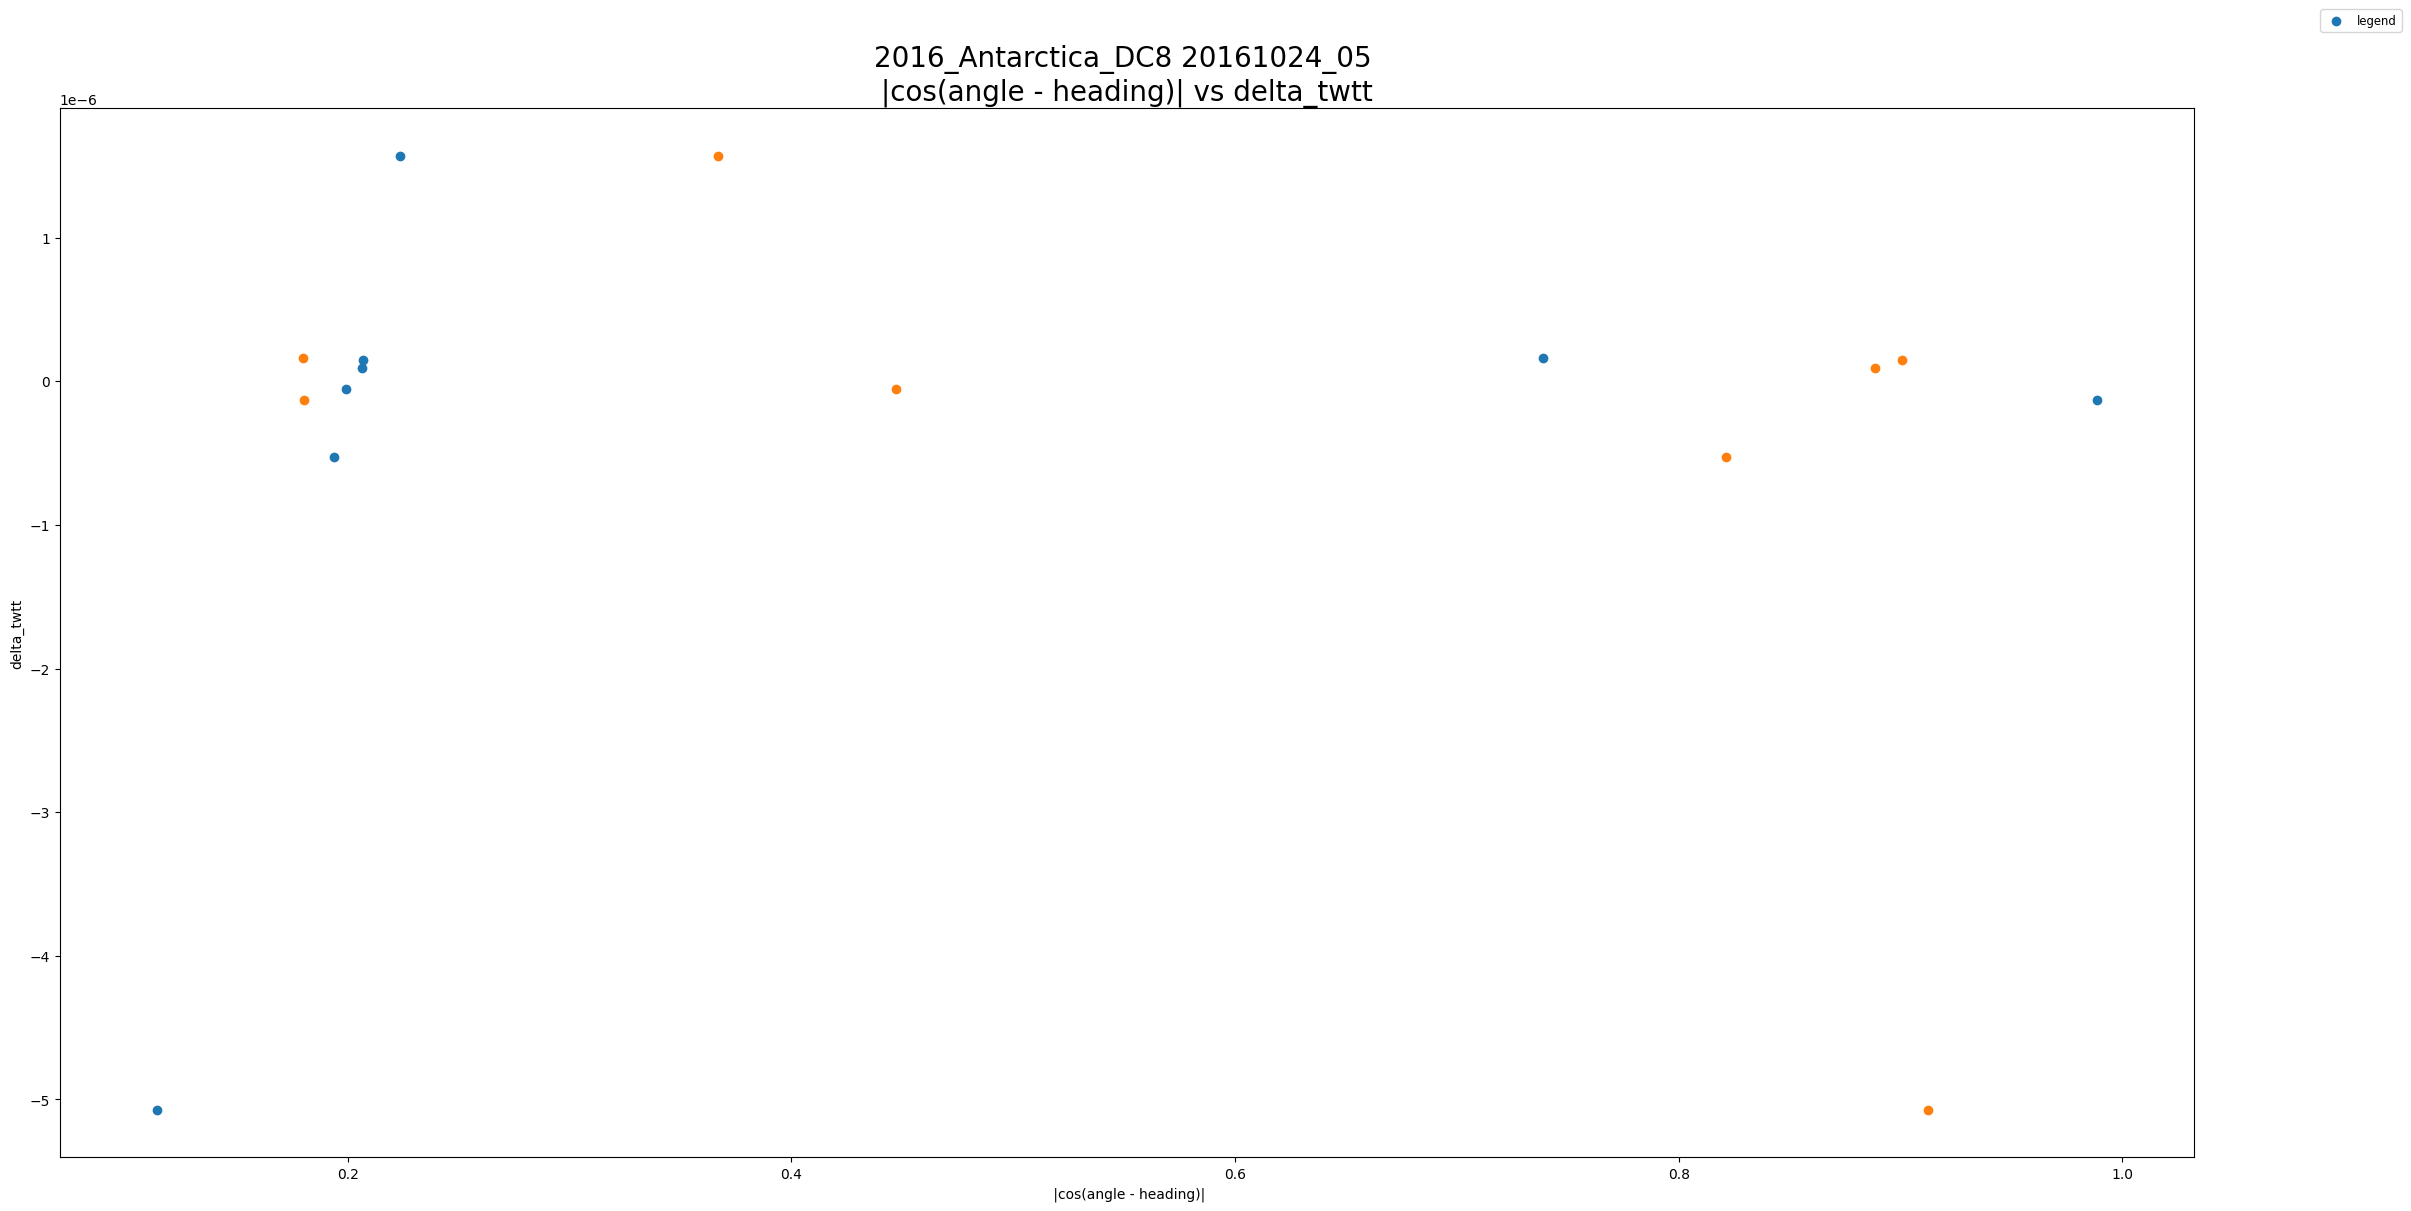

In [33]:
# plot delta_twtt vs |cos(angle - heading) - sin(angle - heading)| * |magnitude|  for each crossover point
plt.figure(figsize=(24, 12), layout='constrained')
# plt.scatter(np.abs(np.cos(np.radians(np.array(angle) - np.array(heading_1)))) * np.abs(np.array(magnitude)), delta_twtt, label='segment 1')
# plt.scatter(np.abs(np.cos(np.radians(np.array(angle) - np.array(heading_2)))) * np.abs(np.array(magnitude)), delta_twtt, label='segment 2')


plt.scatter(np.abs(np.cos(np.radians(np.array(angle) - np.array(heading_1)))), delta_twtt, label='segment 1')
plt.scatter(np.abs(np.cos(np.radians(np.array(angle) - np.array(heading_2)))), delta_twtt, label='segment 2')

# plt.xlabel(" |cos(angle - heading)| * |velocity|")
plt.xlabel(" |cos(angle - heading)|")
plt.ylabel("delta_twtt")
# plt.title(" |cos(angle - heading)| vs delta_twtt")
plt.title(f"{season} {flight} \n|cos(angle - heading)| vs delta_twtt", fontsize=20)

plt.legend(["legend"], fontsize='smaller', loc='upper right', bbox_to_anchor=(1.1, 1.1))
# scale axes to be logarithmic
# plt.xscale('log')
# plt.yscale('log')

# fit a curve to the data and plot it
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

popt, pcov = opt.curve_fit(func, np.abs(np.cos(np.radians(np.array(angle) - np.array(heading_1)))), delta_twtt)


# save the plot as a png file with a high dpi named after the season and flight
plt.savefig(f"{season}_{flight}_cos_angle_heading_vs_delta_twtt_linear.png", dpi=300)

# plt.show()

plt.yscale('log')
# save the plot as a png file with a high dpi named after the season and flight
plt.savefig(f"{season}_{flight}_cos_angle_heading_vs_delta_twtt_logy.png", dpi=300)
plt.show()


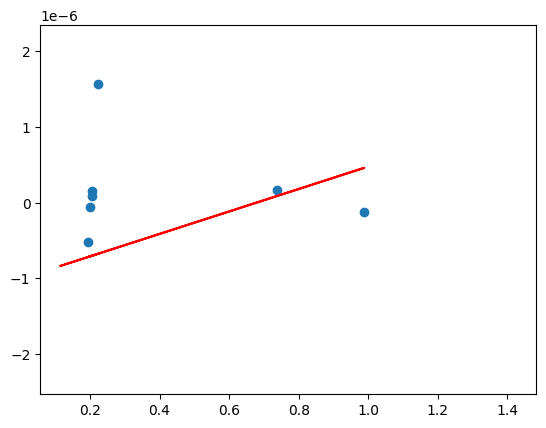

In [44]:
x_data = np.abs(np.cos(np.radians(np.array(angle) - np.array(heading_1))))
y_data = delta_twtt

# fit a curve to the data and plot it
# def func(x, a, b, c):
    # return a * np.exp(-b * x) + c
    
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

popt, pcov = opt.curve_fit(func, x_data, y_data)

# plot the data
plt.scatter(x_data, y_data, label='data')

# set axes to 50% larger than the data
plt.xlim(min(x_data) * 0.5, max(x_data) * 1.5)
plt.ylim(min(y_data) * 0.5, max(y_data) * 1.5)

# plot the curve
plt.plot(x_data, func(x_data, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))




ntuple-ize
    cos(heading-flow)
    difference in theta paralell and perpindicular
    delta_twtt
    v_flow
- stop selecting for angle in upper cells, we can cut the data once we have it

ARA meeting in March Columbus
- talk to Kiet about how he is setting up travel